# Support Vector Machines (SVM)

We know that Logistic regression used to find the best line that fits the data for classification problems.

What if we want to separate the classes by line such that the data under the line are class A and the data upper the line is class B? Will, this is SVM.

SVM is a supervised machine learning algorithm and a parametric model that can be used for classification or regression tasks. Let us focus on the classification problems now.

The primary goal of SVM is to find the optimal hyperplane that best separates data points belonging to different classes in a feature space.

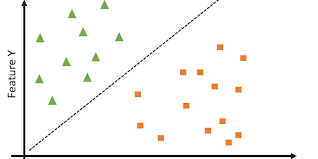

What if we have more features? for instance : predicting the state of BMI based on the features wight, age, height, color, etc.

We can separate the classes in an N-dimensional space using SVM.

#### What is the idea of SVM?

We know that SVM goal is to separate the two classes by a line, but the primary goal is to find the best separate line wuth the largest possible distance to the data instances.

### What is the good line that separate the classes?

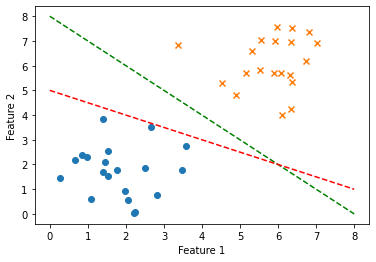

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
class_1 = np.random.randn(20, 2) + [2, 2]
class_2 = np.random.randn(20, 2) + [6, 6]

plt.scatter(class_1[:, 0], class_1[:, 1], marker='o', label='Class 1')
plt.scatter(class_2[:, 0], class_2[:, 1], marker='x', label='Class 2')

good_slope = -1
good_intercept = 8

x_values = np.linspace(0, 8, 100)
y_values_good = good_slope * x_values + good_intercept

plt.plot(x_values, y_values_good, 'g--')

adjusted_bad_slope = -0.5
adjusted_bad_intercept = 5
y_values_adjusted_bad = adjusted_bad_slope * x_values + adjusted_bad_intercept
plt.plot(x_values, y_values_adjusted_bad, 'r--')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show();

#### Solution

1. If we choose the green line, that is the solution because it separate the two classes well with a large distance possible.
2. If we choose the red line, it is not the solution. Why? It is ok, it separate the classes, but not with maximum large distance between the line with the red class data.

#### Terminologies in SVM

1. Margin :
    - The margin is the distance between the hyperplane and the nearest data point from either class. SVM seeks to maximize this margin.

2. Separating Hyperplane :
    - In a two-dimensional space, a hyperplane is a simple linear decision boundary. In three dimensions, it becomes a plane, and in higher dimensions, it's a hyperplane. So, it is the Hyperplane in general that will separate the two classes.
    - For a binary classification problem, the SVM aims to find the hyperplane that maximizes the margin between the two classes.

3. Support Vectors :
    - Support vectors are the data points that lie closest to the decision boundary (hyperplane). These are crucial in determining the optimal hyperplane.

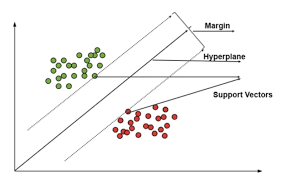

#### SVM Applications

1. Classification:

SVM is commonly used for binary and multi-class classification problems.

2. Regression:

SVM can be applied to regression tasks, known as Support Vector Regression (SVR).

3. Outlier Detection:

SVM can be used for identifying outliers or anomalies in a dataset.

4. Image Recognition:

SVM has been used in image recognition and computer vision applications.

5. Text and Document Classification:

SVM is effective in natural language processing tasks such as text classification and sentiment analysis.

#### SVM Example :-

As we understand, SVM model as trying to separate two classes of data which are color coded in two dimensional scatter plot and we want to separate them with a straight line. And the goal is really to find a linear equation that best separates these two classes of data. If we can find an equation that can 
separate the data cleanly, the the classes are considered to be _linearly separable_.

Let's look at a an example of this, and we're going to go to major leage baseball. I'm going to make the problem
a bit easier and cleaner for us for teaching, but we'll see how to deal with some ambiguity later. Now, the MLB
captures a lot of data about pitches, though a fair bit of it is actually inferred data so it's a little unclear
where each element comes from. But my goal is this: can we use pitching data, sepcifically the speed of the ball 
and the amount of spin it has when leaving the pitchers hand, and predict the type of pitch it will be? We'll
make it even a bit easier, and consider just fastballs and cuveballs, and we'll see if this is a problem which
is something that is linearly seperable.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import zipfile

filename="baseball_svm_data.zip"
df=pd.read_csv(zipfile.ZipFile(filename).open("reg_Sep2019.csv"))

df.head()

,pitch_type,release_speed,release_pos_x,release_pos_z,player_name,batter,events,description,zone,des,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,FS,81.2,-1.0920,6.3157,Jake Faria,435622,run,ball,13.0,Wild pitch by pitcher Jake Faria. Sam Hillia...,...,3,3,3,3,3,3,3,3,Strategic,Strategic
1,FF,90.0,-0.8826,6.4818,Jake Faria,435622,NaN,called_strike,5.0,NaN,...,3,3,3,3,3,3,3,3,Strategic,Strategic
2,SL,83.8,-0.9456,6.2833,Jake Faria,602074,single,hit_into_play_no_out,2.0,Yonathan Daza singles on a bunt ground ball to...,...,3,3,3,3,3,3,3,3,Standard,Standard
3,FF,92.3,-0.8358,6.3745,Jake Faria,602074,NaN,foul,5.0,NaN,...,3,3,3,3,3,3,3,3,Standard,Standard
4,FF,93.0,-0.7746,6.4466,Jake Faria,656541,walk,ball,11.0,Sam Hilliard walks.,...,3,3,3,3,3,3,3,3,Infield shift,Standard


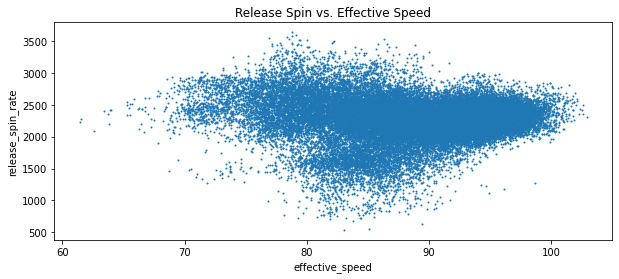

In [3]:
df.plot.scatter(
    "effective_speed",
    "release_spin_rate",
    s=1, figsize=(10, 4),
    title="Release Spin vs. Effective Speed"
);

C:\Users\Hamad\AppData\Local\Temp\ipykernel_18916\3995942288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["color"]="blue"


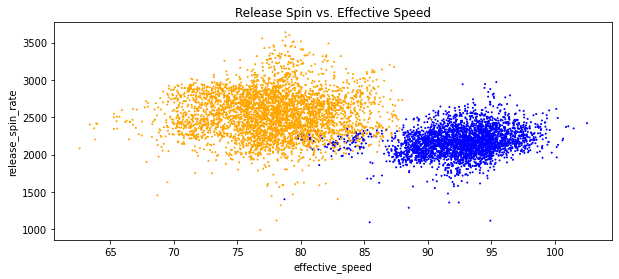

In [4]:
df=df[df["pitch_type"].isin(["FT","CU"])]

df["color"]="blue"

df.loc[df["pitch_type"]=="CU","color"]="orange"

df=df[["effective_speed", "release_spin_rate", "color", "pitch_type"]]
df=df.dropna()

df.plot.scatter(
    "effective_speed",
    "release_spin_rate",
    s=1,
    c="color",
    figsize=(10, 4), 
    legend=True,
    title="Release Spin vs. Effective Speed"
);

In [5]:
from sklearn import svm

clf=svm.SVC(kernel='linear', random_state=1337)

df_pitches=df.loc[0:999]

X_train=df_pitches[["effective_speed", "release_spin_rate"]].loc[0:499]
y_train=df_pitches["pitch_type"].loc[0:499]

X_test=df_pitches[["effective_speed", "release_spin_rate"]].loc[500:]
y_test=df_pitches["pitch_type"].loc[500:]

clf.fit(X_train, y_train).score(X_test, y_test)

1.0

C:\Users\Hamad\AppData\Local\Temp\ipykernel_18916\2149961962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pitches["color"]="blue"


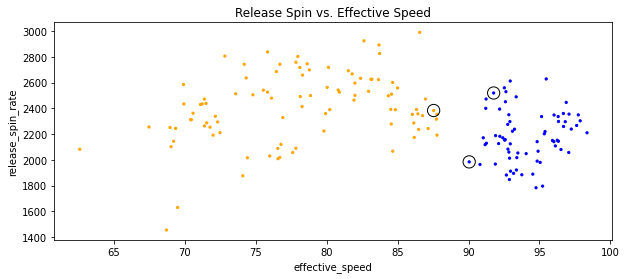

In [6]:
df_pitches["color"]="blue"

df_pitches.loc[df_pitches["pitch_type"]=="CU","color"]="orange"

df_pitches.plot.scatter(
    "effective_speed",
    "release_spin_rate",
    s=5,
    c="color",
    figsize=(10, 4), 
    legend=True,
    title="Release Spin vs. Effective Speed"
);

plt.gca().scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=150,
    linewidth=1,
    facecolors="none",
    edgecolors="k"
);

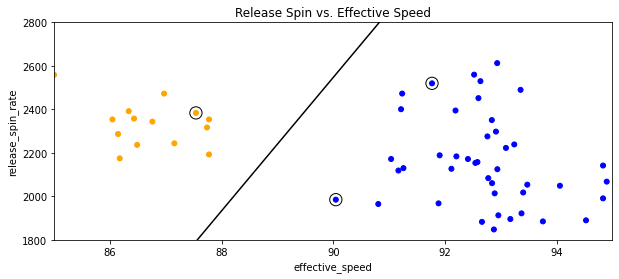

In [7]:
df_pitches.plot.scatter(
    "effective_speed",
    "release_spin_rate",
    s=25, c="color",
    figsize=(10, 4), 
    legend=True,
    title="Release Spin vs. Effective Speed"
)

plt.gca().scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=150,
    linewidth=1,
    facecolors="none",
    edgecolors="k"
)

def calculate_hyperplane(model):
    x_lim=plt.gca().get_xlim()
    y_lim=plt.gca().get_ylim()
    w = model.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(x_lim[0], x_lim[1])
    yy = a * xx - (model.intercept_[0]) / w[1]
    return (xx,yy)

plt.gca().plot( *calculate_hyperplane(clf), 'k-')

plt.xlim([85,95])
plt.ylim([1800,2800])

fig = plt.gcf()

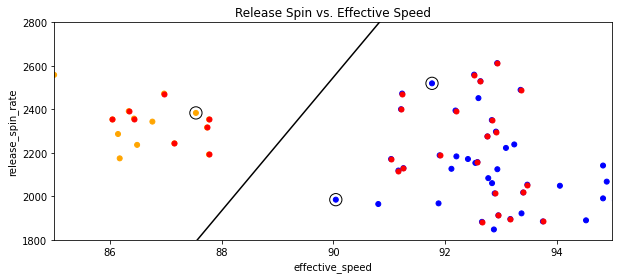

In [8]:
X_test.plot.scatter(
    "effective_speed",
    "release_spin_rate",
    s=25, c="red",
    ax=fig.axes[0]
)

fig

In [9]:
observations=df_pitches.groupby("pitch_type").apply(lambda x: x.reset_index(drop=True)).reset_index(0,drop=True).sort_index()
observations.head()

,effective_speed,release_spin_rate,color,pitch_type
0,84.651,2602.0,orange,CU
0,92.116,2127.0,blue,FT
1,83.118,2627.0,orange,CU
1,90.044,1985.0,blue,FT
2,81.793,2668.0,orange,CU


MovieWriter ffmpeg unavailable; using Pillow instead.


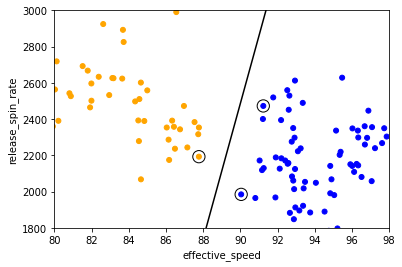

In [10]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots();

def fit_model(data):
    X=data[["effective_speed", "release_spin_rate"]]
    y=data["pitch_type"]
    return clf.fit(X,y)

def update(frame_num):
    
    plt.cla()

    observations[0:int(frame_num)+2].plot.scatter("effective_speed", "release_spin_rate", s=25, c="color", ax=ax)
    
    clf=fit_model(observations[0:int(frame_num)+2])

    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=150,linewidth=1,facecolors="none",edgecolors="k")

    ax.plot(*calculate_hyperplane(clf), 'k-')

    ax.set_xlim(80,98)
    ax.set_ylim(1800,3000)

    return ax.lines;

anim = FuncAnimation(fig, update, frames=350, interval=25, blit=True);
anim.save('svm.gif', fps=5);

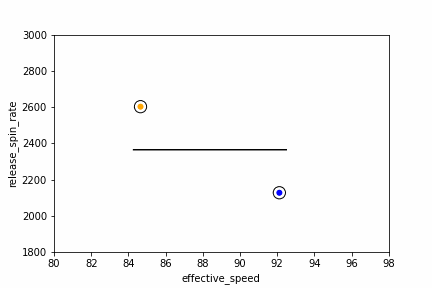

In [11]:
from IPython.display import Image
Image(filename="svm.gif")

# Kernel Trick

SVM have its own primary benifit, which convert the current dimension to a higher dimension to solve non linear problems.

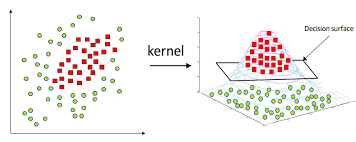

The kernel trick is a technique used to transform the input data into a higher-dimensional space, making it possible to find a linear separation in that space, even if the original data is not linearly separable.

So, it is a solution for solving a non linear problems.

The basic idea behind the kernel trick is to map the input data into a higher-dimensional feature space, where a linear separation may be possible, even if the data is not linearly separable in the original space. The kernel function calculates the dot product of the transformed data points in this higher-dimensional space efficiently, without explicitly computing the transformation.

#### Kernel tricks :-

1. Polynomial Kernel:

This kernel introduces non-linearity by computing the polynomial of degree d of the dot product of the input vectors, where c is a constant.

2. Radial Basis Function (RBF) or Gaussian Kernel:

The RBF kernel is commonly used and introduces a non-linear decision boundary. The parameter σ controls the width of the Gaussian.

The choice of the kernel depends on the nature of the data and the problem at hand. Experimentation and cross-validation are often used to determine the best kernel for a specific task. The kernel trick allows SVMs to efficiently handle non-linear decision boundaries and capture complex relationships in the data.

# Kernel Examples

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

### 1. Polynomial Kernel

In [29]:
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

Text(0.5, 1.0, 'Before Polynomial Kernel')

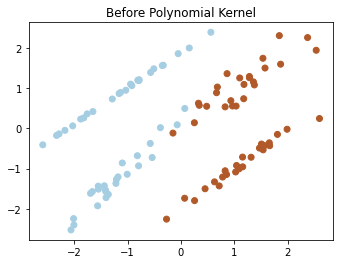

In [30]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Before Polynomial Kernel")

In [31]:
svm_poly = SVC(kernel='poly', degree=5, gamma='auto', coef0=1, C=5)
svm_poly.fit(X, y)

SVC(C=5, coef0=1, degree=5, gamma='auto', kernel='poly')

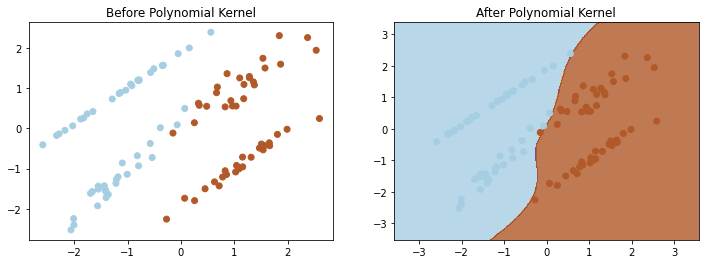

In [32]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Before Polynomial Kernel")

h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("After Polynomial Kernel")
plt.show();

### 2. RBF Kernel (Example 1)

In [17]:
X2, y2 = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

In [18]:
svm_rbf = SVC(kernel='rbf', gamma='auto', C=5)
svm_rbf.fit(X2, y2)

SVC(C=5, gamma='auto')

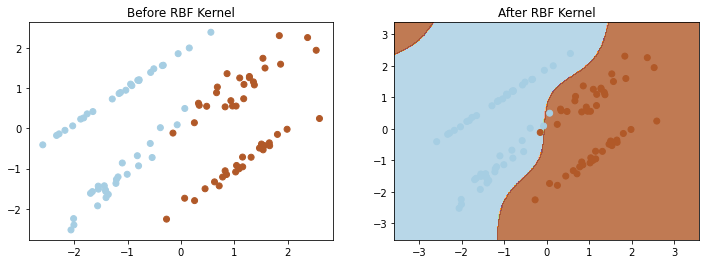

In [19]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap=plt.cm.Paired)
plt.title("Before RBF Kernel")

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap=plt.cm.Paired)
plt.title("After RBF Kernel")
plt.show();

### 2. RBF Kernel (Example 2)

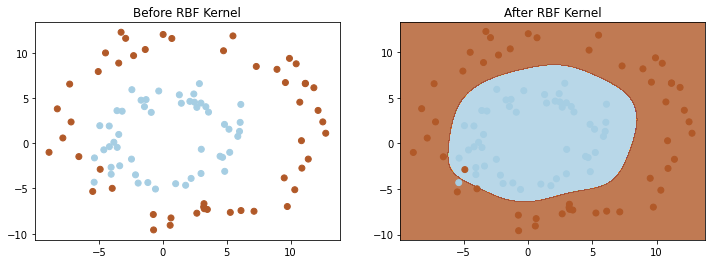

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate synthetic data
np.random.seed(42)
theta_class0 = 2 * np.pi * np.random.rand(50)
theta_class1 = 2 * np.pi * np.random.rand(50)

r_class0 = 5 + np.random.randn(50)
r_class1 = 10 + np.random.randn(50)

class0_x = r_class0 * np.cos(theta_class0)
class0_y = r_class0 * np.sin(theta_class0)

class1_x = r_class1 * np.cos(theta_class1) + 2
class1_y = r_class1 * np.sin(theta_class1) + 2

X = np.vstack((np.hstack((class0_x, class1_x)), np.hstack((class0_y, class1_y)))).T
y = np.hstack((np.zeros(50), np.ones(50)))

# Train SVM with RBF kernel
svm_rbf = svm.SVC(kernel='rbf', gamma=0.1, C=1)
svm_rbf.fit(X, y)

# Plot before kernel
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Before RBF Kernel")

# Plot after kernel
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("After RBF Kernel")
plt.show();